# SVM using SGD

## First look at datasets

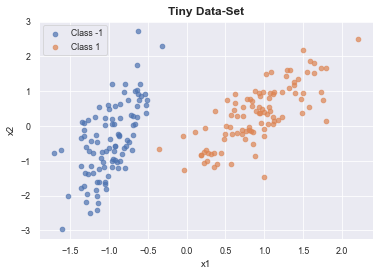

Tiny-Set:


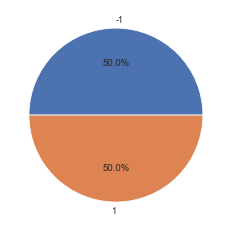

Large-Set:


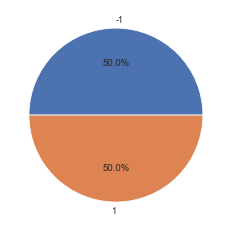

MNIST:


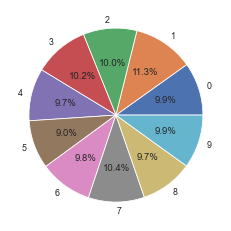

In [1]:
## Dataset tiny
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
dataloader = DataLoader()

# Tiny 
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

# Entire dataset
X = np.concatenate((xtrain, xtest))
Y = np.concatenate((ytrain, ytest))
plt.title("Tiny Data-Set", fontweight="bold", fontsize=12)
plt.scatter(X[Y==-1,0], X[Y==-1,1], label='Class -1', alpha=0.7)
plt.scatter(X[Y==1,0], X[Y==1,1], label='Class 1', alpha=0.7)
plt.xlabel("x1"); plt.ylabel("x2")
plt.legend()
plt.show()

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

print("Tiny-Set:")
plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

# Large 
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()
Y = np.concatenate((ytrain, ytest))

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

print("Large-Set:")
plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

# MNIST
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()
Y = np.concatenate((ytrain, ytest))

counts = dict()
for x in np.unique(Y).astype(int):
    counts[x] = np.count_nonzero(Y == x)

print("MNIST:")
plt.pie(x=counts.values(), labels=counts.keys(), autopct='%1.1f%%')
plt.show() # roughly balanced data set

## Hyperparameter Search -- Tiny

In [7]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from DataUtils import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

lrs = [0.1, 0.5, 1, 3, 5]; Cs = [0.001, 0.01, 0.1, 0.5]
batch_sizes = [10, 20, 30, 40]

results = {}
for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = DataUtils.cross_validation_score(svm, xtrain, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

  0%|          | 0/5 [00:00<?, ?it/s]Finished in 0:00:00.034905
Finished in 0:00:00.029919
Finished in 0:00:00.027949
Finished in 0:00:00.026905
Finished in 0:00:00.024933
Finished in 0:00:00.024934
Finished in 0:00:00.024932
Finished in 0:00:00.023936
Finished in 0:00:00.032912
Finished in 0:00:00.027922
Finished in 0:00:00.025931
Finished in 0:00:00.024933
Finished in 0:00:00.024933
Finished in 0:00:00.024933
Finished in 0:00:00.023936
Finished in 0:00:00.022939
Finished in 0:00:00.023936
Finished in 0:00:00.026928
Finished in 0:00:00.025931
Finished in 0:00:00.022939
Finished in 0:00:00.025930
Finished in 0:00:00.024934
Finished in 0:00:00.027925
Finished in 0:00:00.026929
Finished in 0:00:00.024932
Finished in 0:00:00.027926
Finished in 0:00:00.027926
Finished in 0:00:00.028922
Finished in 0:00:00.028923
Finished in 0:00:00.027926
Finished in 0:00:00.025930
Finished in 0:00:00.027926
Finished in 0:00:00.026929
Finished in 0:00:00.027925
Finished in 0:00:00.026928
Finished in 0:00:0

## Classification accuracy and convergence plot

Finished in 0:00:00.029941

Computed margins and decision boudary for training set:


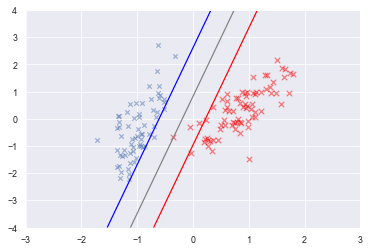

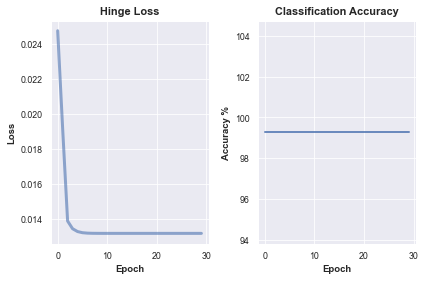


Margins and decision boudary for test set: 


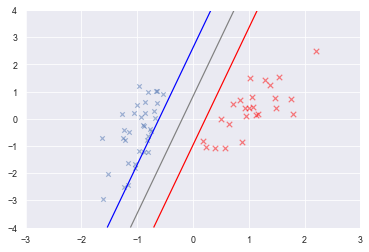


Classification accuracy evaluated on test set with computed weights: 100.0 %



In [9]:
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_tiny()

# best hyperparameters
lr = 1; C = 0.001; batch_size=10
svm = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch_size, show_plot=True, collect_data=True)
svm.fit(xtrain, ytrain)

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.tight_layout()
plt.show()

print("\nMargins and decision boudary for test set: ")
svm.plot_margin(xtest, ytest)

# classification accuracy
print("\nClassification accuracy evaluated on test set with computed weights:", end=" ")
print(round(svm.accuracy(xtest, ytest, svm.optimizer.weight), 2)*100, "%\n")

## Hyperparameter Search -- Large

In [8]:
import matplotlib.pyplot as plt 
from DataLoader import *
from LinearSVM import *
from pprint import pprint
from DataUtils import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

lrs = [0.1, 0.5, 1, 3]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [50, 100, 200]
results = {}

for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            svm = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch, epoch_count=3)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = DataUtils.cross_validation_score(svm, xtrain, ytrain, k=5)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

  0%|          | 0/4 [00:00<?, ?it/s]Finished in 0:00:01.927843
Finished in 0:00:01.956766
Finished in 0:00:01.724389
Finished in 0:00:02.009625
Finished in 0:00:01.773258
Finished in 0:00:01.698456
Finished in 0:00:01.763283
Finished in 0:00:02.034557
Finished in 0:00:01.854019
Finished in 0:00:01.715411
Finished in 0:00:01.700451
Finished in 0:00:01.821107
Finished in 0:00:01.773267
Finished in 0:00:01.701449
Finished in 0:00:01.761288
Finished in 0:00:01.732366
Finished in 0:00:01.750318
Finished in 0:00:01.766276
Finished in 0:00:01.765277
Finished in 0:00:01.771263
Finished in 0:00:01.782253
Finished in 0:00:01.755304
Finished in 0:00:01.867007
Finished in 0:00:01.947810
Finished in 0:00:01.825116
Finished in 0:00:02.044510
Finished in 0:00:01.730351
Finished in 0:00:01.726383
Finished in 0:00:01.784228
Finished in 0:00:01.709406
Finished in 0:00:01.709426
Finished in 0:00:01.760298
Finished in 0:00:01.739347
Finished in 0:00:01.749319
Finished in 0:00:01.871992
Finished in 0:00:0

## Classification accuracy and convergence plot

Finished in 0:00:02.356244


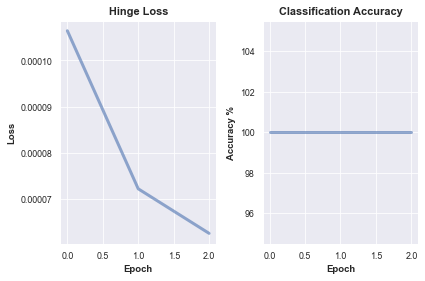


Classification accuracy evaluated on test set with computed weights: 100.0 %



In [11]:
from DataLoader import *
from LinearSVM import *

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_toydata_large()

# best hyperparameters
lr = 0.1; C = 0.001; batch_size=50
svm = LinearSVM(learning_rate=lr, regularization=C, batch_size=batch_size, epoch_count=3, collect_data=True)
svm.fit(xtrain, ytrain)

# Convergence Plots
plt.subplot(1,2,1)
plt.title("Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(svm.accuracies * 100, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")
plt.tight_layout()
plt.show()

# classification accuracy
print("\nClassification accuracy evaluated on test set with computed weights:", end=" ")
print(round(svm.accuracy(xtest, ytest, svm.optimizer.weight), 2)*100, "%\n")

## Hyperparameter Search -- MNIST

In [12]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
from pprint import pprint 

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

# split 10.000 samples off xtrain and do hyperparameter-search using this validation set
indices = np.random.permutation(len(ytrain))
xtrain = xtrain[indices]
ytrain = ytrain[indices]

x_val = xtrain[:10**4]; y_val = ytrain[:10**4]
xtrain = xtrain[10**4:]; ytrain = ytrain[10**4:]

lrs = [0.01, 0.1, 0.5, 1]; Cs = [0.001, 0.01, 0.1]
batch_sizes = [50, 100, 200]

results = {}
for lr in tqdm(lrs):
    for C in Cs:
        for batch in batch_sizes:
            mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch, max_iters=1)
            mc_svm.fit(xtrain, ytrain)
            results[f'lr:{lr}, C:{C}, batch:{batch}'] = mc_svm.accuracy(x_val, y_val)
results = sorted(results.items(), key=lambda l:l[1], reverse=True)

print("\n\n Best parameters and their resulting classification accuracy:")
pprint(results[:5])

100%|██████████| 4/4 [29:08<00:00, 437.12s/it]

 Best parameters and their resulting classification accuracy:
[('lr:0.01, C:0.01, batch:50', 0.9163),
 ('lr:0.1, C:0.001, batch:200', 0.9153),
 ('lr:0.01, C:0.001, batch:50', 0.9148),
 ('lr:0.01, C:0.1, batch:50', 0.9137),
 ('lr:0.1, C:0.1, batch:200', 0.9128)]



## Classification accuracy and convergence plot

100%|██████████| 3/3 [03:08<00:00, 62.93s/it]
Runtime: 188.8 s


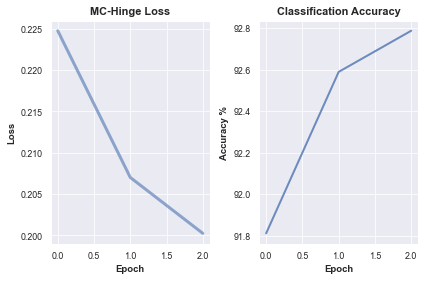


Classification accuracy evaluated on test set: 92.54 %


In [13]:
from MultiClassSVM import *
import matplotlib.pyplot as plt 
from DataLoader import *
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set_context('paper')

dataloader = DataLoader()
xtrain, xtest, ytrain, ytest = dataloader.get_mnist()

# best hyperparameters
lr = 0.01; C = 0.01; batch_size=50
mc_svm = MultiClassSVM(lr=lr, C=C, batch_size=batch_size, max_iters=3, tqdm_toggle=True)
mc_svm.fit(xtrain, ytrain)
print(f"Runtime: {round(mc_svm.runtime, 2)} s")

# Convergence Plots
plt.subplot(1,2,1)
plt.title("MC-Hinge Loss", fontweight="bold", fontsize=11)
plt.plot(mc_svm.losses, lw=3, alpha=0.6)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Loss", fontweight="bold")

plt.subplot(1,2,2)
plt.title("Classification Accuracy", fontweight="bold", fontsize=11)
plt.plot(mc_svm.accuracies * 100, lw=2, alpha=0.8)
plt.xlabel("Epoch", fontweight="bold"); plt.ylabel("Accuracy %", fontweight="bold")

plt.tight_layout()
plt.show()

# classification accuracy
print("\nClassification accuracy evaluated on test set:", end=" ")
print(round(mc_svm.accuracy(xtest, ytest), 5)*100, "%")